In [19]:
from fusion_function import compute_cd_ds, average_score_combination, average_rank_combination, \
    weighted_score_combination_by_ds, weighted_rank_combination_by_ds, compute_performance


In [1]:
import numpy as np
import pandas as pd

In [2]:
data = np.load("../diffqas_predictions_magic_gamma_20260212_050505.npz")
data.files

['y_true',
 'pred_H_RX_std_RX',
 'pred_H_RX_std_RY',
 'pred_H_RX_std_RZ',
 'pred_H_RX_cyc_RX',
 'pred_H_RX_cyc_RY',
 'pred_H_RX_cyc_RZ',
 'pred_H_RY_std_RX',
 'pred_H_RY_std_RY',
 'pred_H_RY_std_RZ',
 'pred_H_RY_cyc_RX',
 'pred_H_RY_cyc_RY',
 'pred_H_RY_cyc_RZ',
 'pred_H_RZ_std_RX',
 'pred_H_RZ_std_RY',
 'pred_H_RZ_std_RZ',
 'pred_H_RZ_cyc_RX',
 'pred_H_RZ_cyc_RY',
 'pred_H_RZ_cyc_RZ',
 'pred_noH_RX_std_RX',
 'pred_noH_RX_std_RY',
 'pred_noH_RX_std_RZ',
 'pred_noH_RX_cyc_RX',
 'pred_noH_RX_cyc_RY',
 'pred_noH_RX_cyc_RZ',
 'pred_noH_RY_std_RX',
 'pred_noH_RY_std_RY',
 'pred_noH_RY_std_RZ',
 'pred_noH_RY_cyc_RX',
 'pred_noH_RY_cyc_RY',
 'pred_noH_RY_cyc_RZ',
 'pred_noH_RZ_std_RX',
 'pred_noH_RZ_std_RY',
 'pred_noH_RZ_std_RZ',
 'pred_noH_RZ_cyc_RX',
 'pred_noH_RZ_cyc_RY',
 'pred_noH_RZ_cyc_RZ']

In [3]:
models = data.files[1:]
models

['pred_H_RX_std_RX',
 'pred_H_RX_std_RY',
 'pred_H_RX_std_RZ',
 'pred_H_RX_cyc_RX',
 'pred_H_RX_cyc_RY',
 'pred_H_RX_cyc_RZ',
 'pred_H_RY_std_RX',
 'pred_H_RY_std_RY',
 'pred_H_RY_std_RZ',
 'pred_H_RY_cyc_RX',
 'pred_H_RY_cyc_RY',
 'pred_H_RY_cyc_RZ',
 'pred_H_RZ_std_RX',
 'pred_H_RZ_std_RY',
 'pred_H_RZ_std_RZ',
 'pred_H_RZ_cyc_RX',
 'pred_H_RZ_cyc_RY',
 'pred_H_RZ_cyc_RZ',
 'pred_noH_RX_std_RX',
 'pred_noH_RX_std_RY',
 'pred_noH_RX_std_RZ',
 'pred_noH_RX_cyc_RX',
 'pred_noH_RX_cyc_RY',
 'pred_noH_RX_cyc_RZ',
 'pred_noH_RY_std_RX',
 'pred_noH_RY_std_RY',
 'pred_noH_RY_std_RZ',
 'pred_noH_RY_cyc_RX',
 'pred_noH_RY_cyc_RY',
 'pred_noH_RY_cyc_RZ',
 'pred_noH_RZ_std_RX',
 'pred_noH_RZ_std_RY',
 'pred_noH_RZ_std_RZ',
 'pred_noH_RZ_cyc_RX',
 'pred_noH_RZ_cyc_RY',
 'pred_noH_RZ_cyc_RZ']

In [4]:
prob_df = pd.concat([pd.Series(data[m], name = m) for m in models], axis = 1)
prob_df.head(3)

,pred_H_RX_std_RX,pred_H_RX_std_RY,pred_H_RX_std_RZ,pred_H_RX_cyc_RX,pred_H_RX_cyc_RY,pred_H_RX_cyc_RZ,pred_H_RY_std_RX,pred_H_RY_std_RY,pred_H_RY_std_RZ,pred_H_RY_cyc_RX,...,pred_noH_RY_std_RZ,pred_noH_RY_cyc_RX,pred_noH_RY_cyc_RY,pred_noH_RY_cyc_RZ,pred_noH_RZ_std_RX,pred_noH_RZ_std_RY,pred_noH_RZ_std_RZ,pred_noH_RZ_cyc_RX,pred_noH_RZ_cyc_RY,pred_noH_RZ_cyc_RZ
0,0.325533,0.327261,0.325533,0.325533,0.325255,0.325533,0.014144,0.030560,0.017420,0.003784,...,0.091405,0.023912,0.146871,0.094899,0.319317,0.325685,0.355362,0.319314,0.319443,0.355362
1,0.325533,0.327261,0.325533,0.325533,0.325255,0.325533,0.002712,0.006150,0.001615,0.000361,...,0.002262,0.013351,0.004092,0.039913,0.319317,0.325685,0.355362,0.319314,0.319443,0.355362
2,0.325533,0.327261,0.325533,0.325533,0.325255,0.325533,0.324476,0.438159,0.501666,0.327218,...,0.162144,0.569039,0.252237,0.505952,0.319317,0.325685,0.355362,0.319314,0.319443,0.355362


In [12]:
from cfa.combinatorial_fusion import cfa_single_layer, RSC_graph, performance_plot


In [14]:
import sys
!{sys.executable} -m pip show cfa


Name: CFA
Version: 0.1.0
Summary: CFA Python package
Home-page: 
Author: 
Author-email: 
License: 
Location: /Users/yuanhong/miniforge3/lib/python3.12/site-packages
Requires: 
Required-by: 


In [7]:
import cfa, sys
print("cfa loaded from:", cfa.__file__)
print("python:", sys.executable)


cfa loaded from: /Users/yuanhong/miniforge3/lib/python3.12/site-packages/cfa/__init__.py
python: /Users/yuanhong/miniforge3/bin/python


In [8]:
# use previous style
import matplotlib.pyplot as plt
plt.style.use("../../QAIfusion/recovered_style.mplstyle")

In [9]:
prob_df_colUnique = prob_df.T.drop_duplicates().T
prob_df_colUnique.shape
# remove constant columns
prob_df_colUnique = prob_df_colUnique.loc[:, prob_df_colUnique.nunique() > 3]
prob_df_colUnique.shape

(3804, 20)

In [12]:
compute_performance(prob_df_colUnique, perf_metric="accuracy", y_true=data['y_true'])

pred_H_RY_std_RX      0.870925
pred_H_RY_std_RY      0.872503
pred_H_RY_std_RZ      0.876183
pred_H_RY_cyc_RX      0.867508
pred_H_RY_cyc_RY      0.871714
pred_H_RY_cyc_RZ      0.867771
pred_H_RZ_std_RX      0.861987
pred_H_RZ_std_RY      0.872240
pred_H_RZ_cyc_RX      0.850946
pred_H_RZ_cyc_RY      0.870925
pred_noH_RX_std_RX    0.871188
pred_noH_RX_std_RY    0.871451
pred_noH_RX_std_RZ    0.870137
pred_noH_RX_cyc_RX    0.868559
pred_noH_RX_cyc_RY    0.876183
pred_noH_RX_cyc_RZ    0.861987
pred_noH_RY_std_RX    0.869348
pred_noH_RY_std_RY    0.873291
pred_noH_RY_cyc_RX    0.864353
pred_noH_RY_cyc_RY    0.871977
Name: accuracy, dtype: float64

In [10]:
fusion_df = cfa_single_layer(prob_df_colUnique.iloc[:, 0:5], data['y_true'], perf_metric="accuracy")
fusion_df.head(3)

,asc,wscds,arc,wrcds
A,0.870925,0.870925,0.870925,0.870925
B,0.872503,0.872503,0.872503,0.872503
C,0.876183,0.876183,0.876183,0.876183


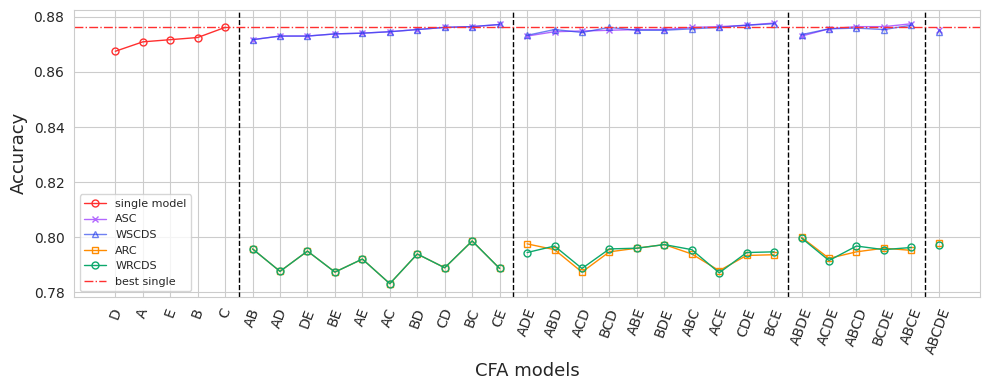

Best combination: 0.8778
Best single: 0.8762


In [13]:
fusion_df_sorted = performance_plot(fusion_df)